# 0703小波包批量分解重构数据集

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
# import tensorflow as tf
import keras
import pywt    #小波包
from pandas import read_csv
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\

In [2]:
print(os.getcwd())

E:\Research Project\DKASC, Alice Springs


In [3]:
os.listdir(os.getcwd())

['.idea',
 '.ipynb_checkpoints',
 '101-Site_DKA-WeatherStation',
 '96-Site_DKA-MasterMeter1',
 'Alice_Springs_2016-2020',
 'Dataset',
 'logs',
 'picture',
 'Predict',
 'Program backups',
 'temp',
 'venv',
 '数据集_小波包分解重构数据.ipynb',
 '数据集_预处理_第二版0702.ipynb',
 '测试小波分解.ipynb',
 '测试模型0622.ipynb',
 '画图.ipynb',
 '笔记.ipynb',
 '训练模型0622.ipynb',
 '训练模型0702.ipynb',
 '训练模型0703 WPD.ipynb']

In [4]:
os.chdir('./Dataset/train0702/')

In [5]:
os.listdir()

['train_Station_1.csv',
 'train_Station_2.csv',
 'train_Station_3.csv',
 'train_Station_4.csv',
 'train_Station_5.csv',
 'train_Station_6.csv',
 'train_Station_7.csv',
 'train_Station_8.csv',
 'train_Station_9.csv']

In [6]:
file_chdir = os.getcwd()

In [7]:
file_chdir

'E:\\Research Project\\DKASC, Alice Springs\\Dataset\\train0702'

In [8]:
filecsv_list = []
for root,dirs,files in os.walk(file_chdir):
    for file in files:
        if os.path.splitext(file)[1] == '.csv':
            filecsv_list.append(file)

In [9]:
filecsv_list

['train_Station_1.csv',
 'train_Station_2.csv',
 'train_Station_3.csv',
 'train_Station_4.csv',
 'train_Station_5.csv',
 'train_Station_6.csv',
 'train_Station_7.csv',
 'train_Station_8.csv',
 'train_Station_9.csv']

In [10]:
for csv in filecsv_list:
    tra=pd.read_csv(csv)

    plotaa = list(tra.columns)
    plotaa[len(plotaa)-1]
    data = tra[plotaa[len(plotaa)-1]].values
#     coeffs = pywt.wavedec(data, 'db3', level=3)
#     cA3, cD3, cD2 ,cD1 = coeffs

#     A3 = pywt.upcoef('a', pywt.upcoef('a', pywt.upcoef('a', cA3, 'db3',take=len(cD2)), 'db3',take=len(cD1)), 'db3',take=len(data))
#     D3 = pywt.upcoef('a', pywt.upcoef('a', pywt.upcoef('d', cD3, 'db3',take=len(cD2)), 'db3',take=len(cD1)), 'db3',take=len(data))
#     D2 = pywt.upcoef('a', pywt.upcoef('d', cD2, 'db3',take=len(cD1)), 'db3',take=len(data))
#     D1 = pywt.upcoef('d', cD1, 'db3',take=len(data))

#     tra.insert(tra.shape[1]-1,'D1',value= D1,allow_duplicates=True) 
#     tra.insert(tra.shape[1]-1,'D2',value= D2,allow_duplicates=True) 
#     tra.insert(tra.shape[1]-1,'D3',value= D3,allow_duplicates=True) 
#     tra.insert(tra.shape[1]-1,'A3',value= A3,allow_duplicates=True) 
    
    (cA, cD) = pywt.dwt(data, 'db3')
    A = pywt.upcoef('a', cA, 'db3', take=len(data)) 
    D = pywt.upcoef('d', cD, 'db3', take=len(data))
    tra.insert(tra.shape[1]-1,'A',value= A,allow_duplicates=True) 
    tra.insert(tra.shape[1]-1,'D',value= D,allow_duplicates=True) 
    
    filen = 'WPD_%s'% csv.strip('.csv')
    tra.to_csv('../trainWPD/%s.csv' % filen,index=False)

In [11]:
print(os.getcwd())

E:\Research Project\DKASC, Alice Springs\Dataset\train0702


In [12]:
os.chdir('../test0702/')

In [13]:
os.listdir()

['test_Station_1.csv',
 'test_Station_2.csv',
 'test_Station_3.csv',
 'test_Station_4.csv',
 'test_Station_5.csv',
 'test_Station_6.csv',
 'test_Station_7.csv',
 'test_Station_8.csv',
 'test_Station_9.csv']

In [14]:
file_chdir = os.getcwd()

In [15]:
file_chdir

'E:\\Research Project\\DKASC, Alice Springs\\Dataset\\test0702'

In [16]:
filecsv_list = []
for root,dirs,files in os.walk(file_chdir):
    for file in files:
        if os.path.splitext(file)[1] == '.csv':
            filecsv_list.append(file)

In [17]:
filecsv_list

['test_Station_1.csv',
 'test_Station_2.csv',
 'test_Station_3.csv',
 'test_Station_4.csv',
 'test_Station_5.csv',
 'test_Station_6.csv',
 'test_Station_7.csv',
 'test_Station_8.csv',
 'test_Station_9.csv']

In [18]:
(cA, cD) = pywt.dwt(data, 'db3')

In [19]:
for csv in filecsv_list:
    tra=pd.read_csv(csv)

    plotaa = list(tra.columns)
    plotaa[len(plotaa)-1]
    data = tra[plotaa[len(plotaa)-1]].values
#     coeffs = pywt.wavedec(data, 'db3', level=3)
#     cA3, cD3, cD2 ,cD1 = coeffs

#     A3 = pywt.upcoef('a', pywt.upcoef('a', pywt.upcoef('a', cA3, 'db3',take=len(cD2)), 'db3',take=len(cD1)), 'db3',take=len(data))
#     D3 = pywt.upcoef('a', pywt.upcoef('a', pywt.upcoef('d', cD3, 'db3',take=len(cD2)), 'db3',take=len(cD1)), 'db3',take=len(data))
#     D2 = pywt.upcoef('a', pywt.upcoef('d', cD2, 'db3',take=len(cD1)), 'db3',take=len(data))
#     D1 = pywt.upcoef('d', cD1, 'db3',take=len(data))

#     tra.insert(tra.shape[1]-1,'D1',value= D1,allow_duplicates=True) 
#     tra.insert(tra.shape[1]-1,'D2',value= D2,allow_duplicates=True) 
#     tra.insert(tra.shape[1]-1,'D3',value= D3,allow_duplicates=True) 
#     tra.insert(tra.shape[1]-1,'A3',value= A3,allow_duplicates=True) 
    
    (cA, cD) = pywt.dwt(data, 'db3')
    A = pywt.upcoef('a', cA, 'db3', take=len(data)) 
    D = pywt.upcoef('d', cD, 'db3', take=len(data))
    tra.insert(tra.shape[1]-1,'A',value= A,allow_duplicates=True) 
    tra.insert(tra.shape[1]-1,'D',value= D,allow_duplicates=True) 
    
    filen = 'WPD_%s'% csv.strip('.csv')
    tra.to_csv('../testWPD/%s.csv' % filen,index=False)

In [20]:
tra.head(1)

,Timestamp,Year,Month,Day,Hour,Minutes,Temperature(°C),Relative Humidity(%),Wind Direction(Degrees),Daily Rainfall(mm),Global Horizontal Radiation(W/m²),Diffuse Horizontal Radiation(W/m²),A,D,Station_9
0,2019/1/1 0:00,2019,1,1,0,0,30.020723,20.125513,32.21347,0.0,1.543787,1.349848,0.0,0.0,0.0


In [21]:
tra.corr()

,Year,Month,Day,Hour,Minutes,Temperature(°C),Relative Humidity(%),Wind Direction(Degrees),Daily Rainfall(mm),Global Horizontal Radiation(W/m²),Diffuse Horizontal Radiation(W/m²),A,D,Station_9
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000e+00,0.012516,-0.001307,0.000059,-0.089677,-0.126977,0.196439,-0.022474,0.016529,0.027530,-1.211966e-02,5.400341e-19,-0.012100
Day,NaN,1.251566e-02,1.000000,0.001135,0.000038,0.001549,0.040691,-0.005795,0.032094,-0.021430,0.060344,-1.700942e-02,-4.106950e-05,-0.016984
Hour,NaN,-1.307059e-03,0.001135,1.000000,-0.000062,0.281528,-0.303579,-0.214453,0.034298,0.063535,0.079994,7.083068e-02,4.788562e-05,0.070717
Minutes,NaN,5.880203e-05,0.000038,-0.000062,1.000000,0.000075,0.000022,-0.000133,0.001808,-0.000092,-0.000716,1.211908e-04,-2.908510e-03,-0.000046
Temperature(°C),NaN,-8.967725e-02,0.001549,0.281528,0.000075,1.000000,-0.729951,-0.880595,-0.028779,0.484811,0.463912,4.531408e-01,9.353277e-04,0.452451
Relative Humidity(%),NaN,-1.269769e-01,0.040691,-0.303579,0.000022,-0.729951,1.000000,0.582259,0.233975,-0.395939,-0.294355,-3.736610e-01,1.546730e-04,-0.373039
Wind Direction(Degrees),NaN,1.964389e-01,-0.005795,-0.214453,-0.000133,-0.880595,0.582259,1.000000,-0.002829,-0.458919,-0.466567,-4.236910e-01,1.862564e-03,-0.422889
Daily Rainfall(mm),NaN,-2.247419e-02,0.032094,0.034298,0.001808,-0.028779,0.233975,-0.002829,1.000000,-0.028995,-0.013541,-2.215820e-02,-1.056095e-06,-0.022122
Global Horizontal Radiation(W/m²),NaN,1.652876e-02,-0.021430,0.063535,-0.000092,0.484811,-0.395939,-0.458919,-0.028995,1.000000,0.662977,9.893900e-01,4.896490e-02,0.990570


In [22]:
# plotaa = list(tra.columns)
# plotaa.remove('Timestamp')
# for i in plotaa:
#     plt.figure()
#     plt.plot(tra[i],'b',label= i)
#     plt.title(i)
#     plt.ylabel(i)
#     plt.xlabel('Time')
#     plt.legend()

NameError: name 'cA3' is not defined

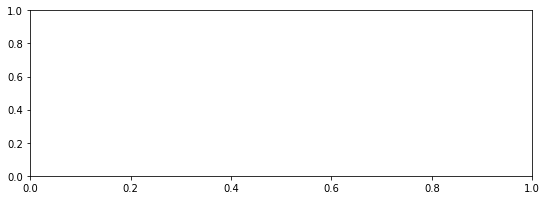

In [23]:
plt.figure(figsize=(9, 14))
plt.subplot(4,1,1)
# plt.xticks([1,3,6,9,12])
plt.plot(cA3,'b',label='cA3')
plt.title('cA3')
plt.ylabel('Power(kW)')
# plt.xlim((1, 12))

plt.subplot(4,1,2)
plt.plot(cD1,'b',label='cD1')
plt.title('')
plt.ylabel('Power(kW)')
# plt.xlabel('Time')

plt.subplot(4,1,3)
plt.plot( cD2,'b',label='cD2')
# plt.title('Day')
plt.ylabel('Power(kW)')
# plt.xlabel('Time')

plt.subplot(4,1,4)
plt.plot( cD3,'b',label='cD3')
# plt.title('Day')
plt.ylabel('Power(kW)')
plt.xlabel('Time')
plt.legend()
# plt.legend()

In [ ]:
from pylab import *
plt.rcParams['font.sans-serif'] = ['SimHei']  #SimHei黑体
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(13, 9))
plt.subplot(5,1,1)
plt.plot(data,'b',label='原始数据')
plt.title('光伏发电功率序列',fontsize="16")
plt.ylabel('功率(kW)',fontsize="14")
# plt.xlabel('Time')
plt.legend(loc=1,fontsize="14")

plt.subplot(5,1,2)
# plt.xtiks([1,3,6,9,12])
plt.plot(A3,'b',label='序列1')

# plt.title('Year')
plt.ylabel('功率(kW)',fontsize="14")
plt.legend(loc=1,fontsize="14")
# plt.xlim((1, 12))


# plt.xlabel('Time')

plt.subplot(5,1,3)
plt.plot(D3,'b',label='序列2')
# plt.title('Month')
plt.ylabel('功率(kW)',fontsize="14")
plt.legend(loc=1,fontsize="14")
# plt.xlabel('Time')

plt.subplot(5,1,4)
plt.plot( D2,'b',label='序列3')
# plt.title('Day')
plt.ylabel('功率(kW)',fontsize="14")
plt.legend(loc=1,fontsize="14")
# plt.xlabel('Time')

plt.subplot(5,1,5)
plt.plot( D1,'b',label='序列4')
# plt.title('Day')
plt.ylabel('功率(kW)',fontsize="14")
plt.xlabel('时间序列',fontsize="14")
plt.legend(loc=1,fontsize="14")
# plt.legend()
plt.savefig('../picture/小波分解重构.jpg',dpi=300)
plt.savefig('../picture/小波分解重构.svg',format="svg",dpi=300)